# Import library

In [1]:
# # Clear output Kaggle
# # Clear output folder
# import os

# def remove_folder_contents(folder):
#     for the_file in os.listdir(folder):
#         file_path = os.path.join(folder, the_file)
#         try:
#             if os.path.isfile(file_path):
#                 os.unlink(file_path)
#             elif os.path.isdir(file_path):
#                 remove_folder_contents(file_path)
#                 os.rmdir(file_path)
#         except Exception as e:
#             print(e)

# folder_path = '/kaggle/working'
# remove_folder_contents(folder_path)
# os.rmdir(folder_path)

In [2]:
from skimage.io import imread, imshow
import numpy as np
import matplotlib.pyplot as plt
import cv2
from math import sqrt,exp

# Membuat Filter

In [3]:
def distance(point1,point2):
    return sqrt((point1[0]-point2[0])**2 + (point1[1]-point2[1])**2)

def idealFilterLP(D0,imgShape):
    base = np.zeros(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 1
    return base

def idealFilterHP(D0,imgShape):
    base = np.ones(imgShape[:2])
    rows, cols = imgShape[:2]
    center = (rows/2,cols/2)
    for x in range(cols):
        for y in range(rows):
            if distance((y,x),center) < D0:
                base[y,x] = 0
    return base



# Proses FFT

----------Pneumonia----------


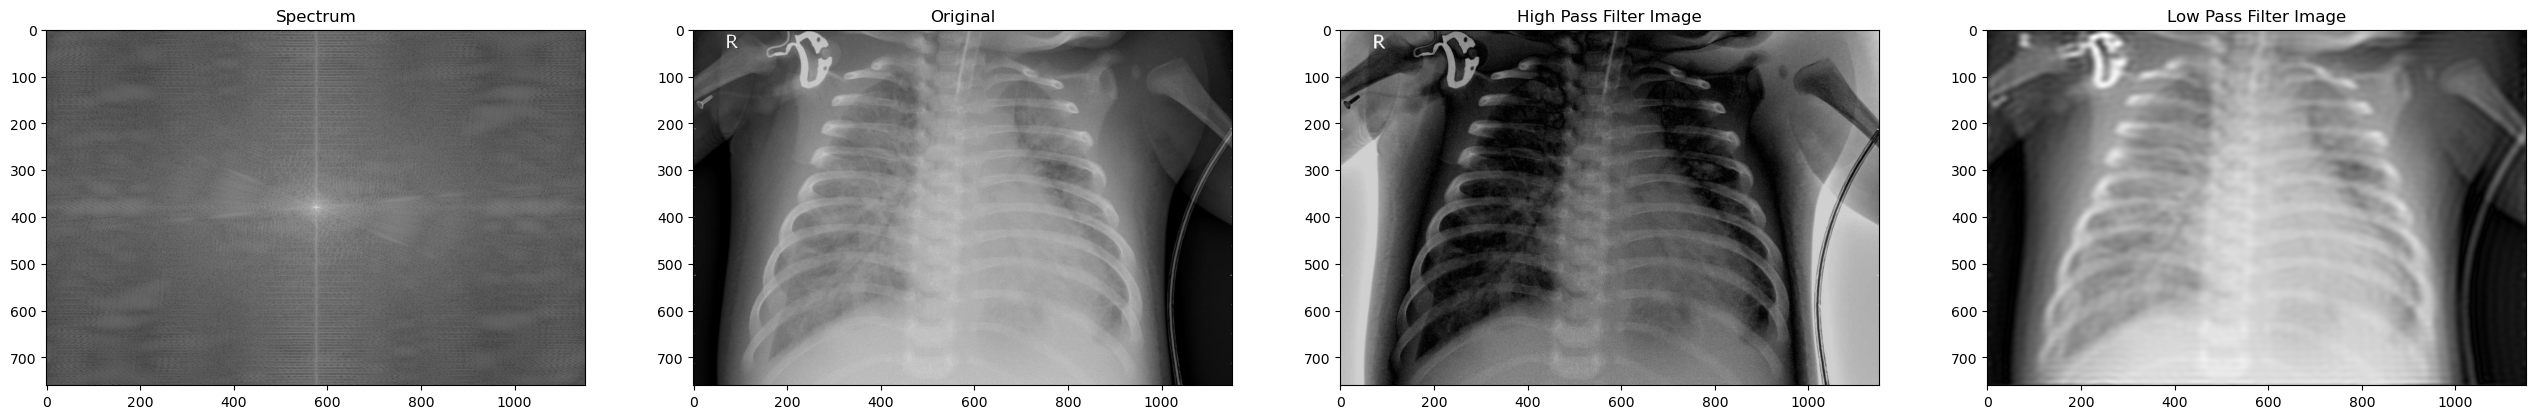

----------Normal----------


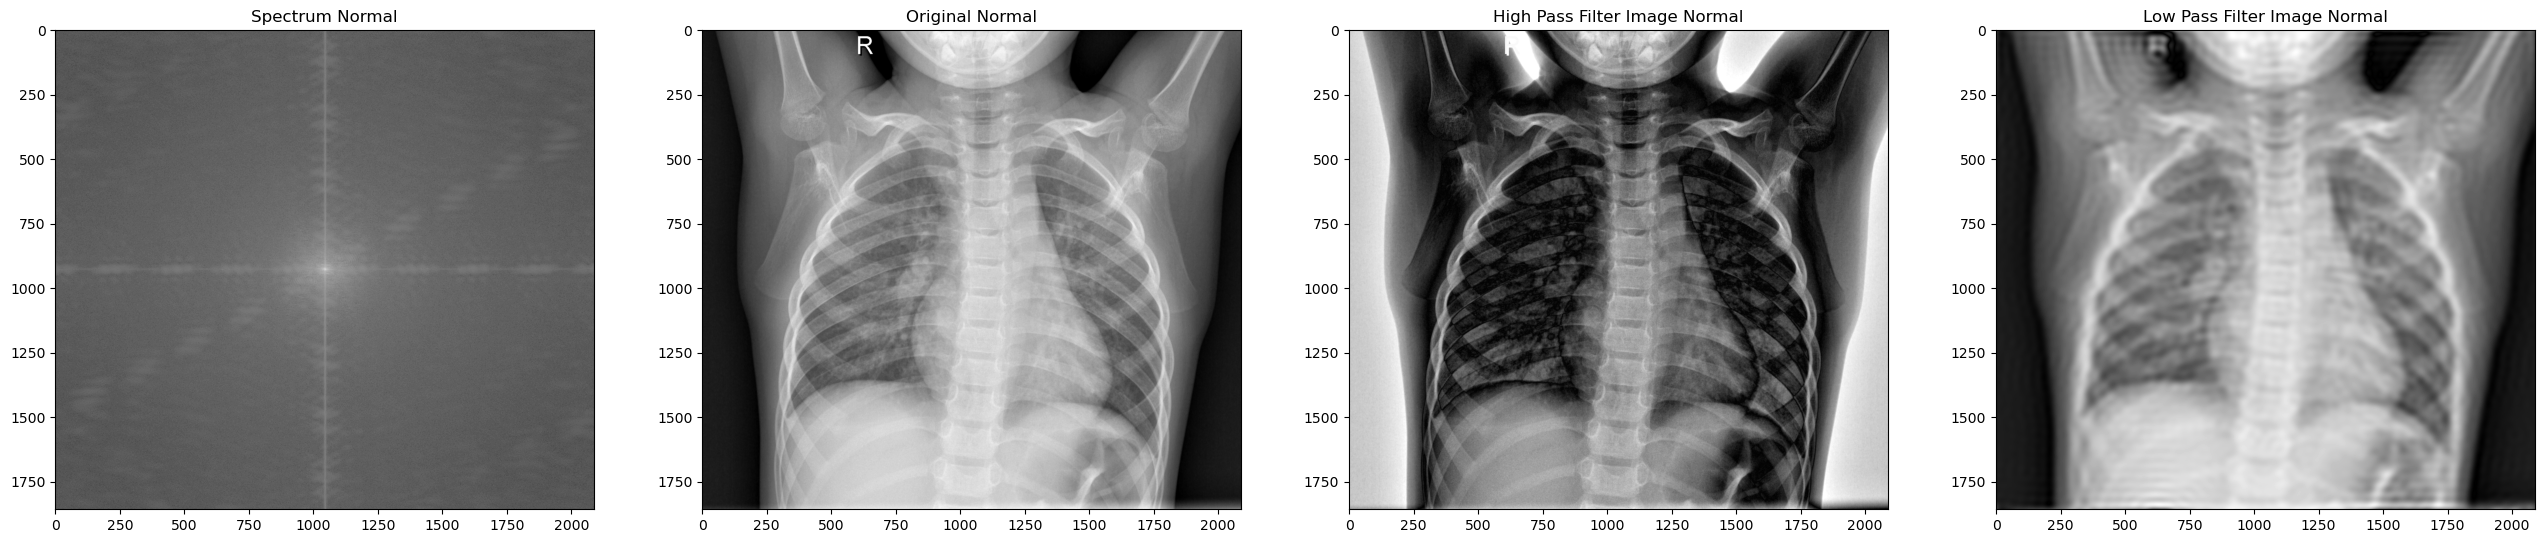

--------------------------------------------------------------------------------------------------- 

----------Pneumonia----------


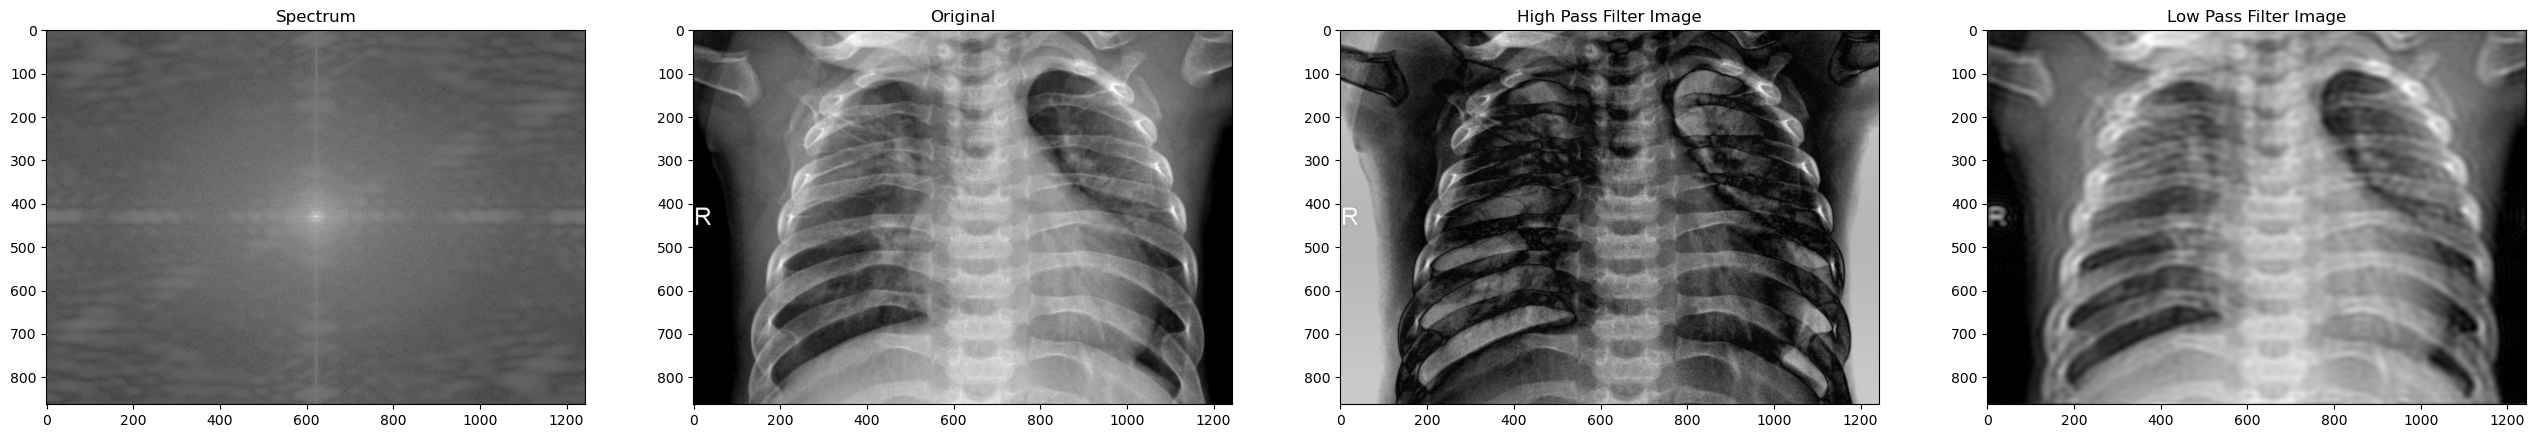

----------Normal----------


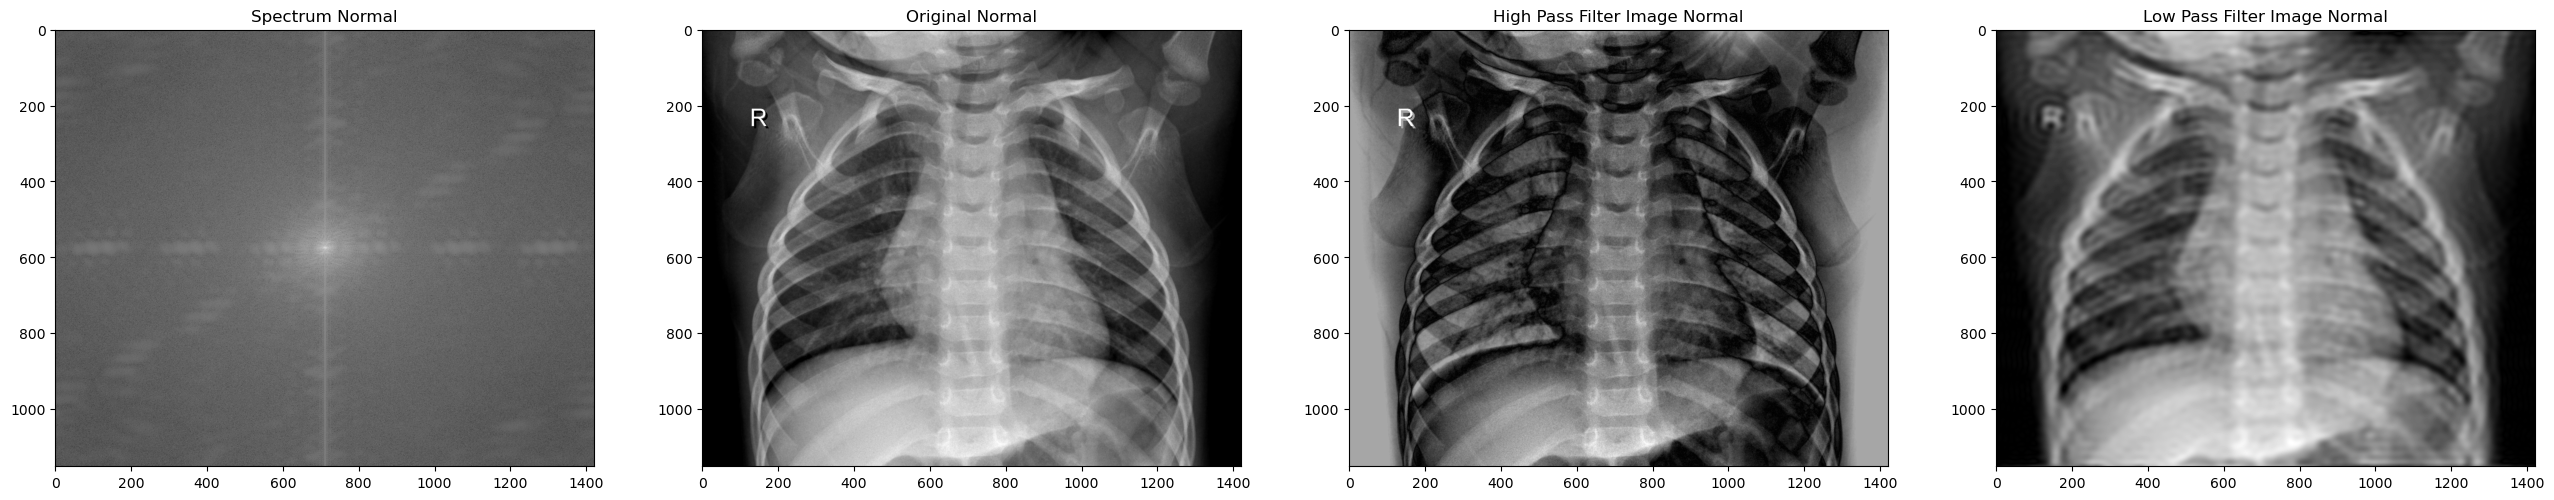

--------------------------------------------------------------------------------------------------- 

----------Pneumonia----------


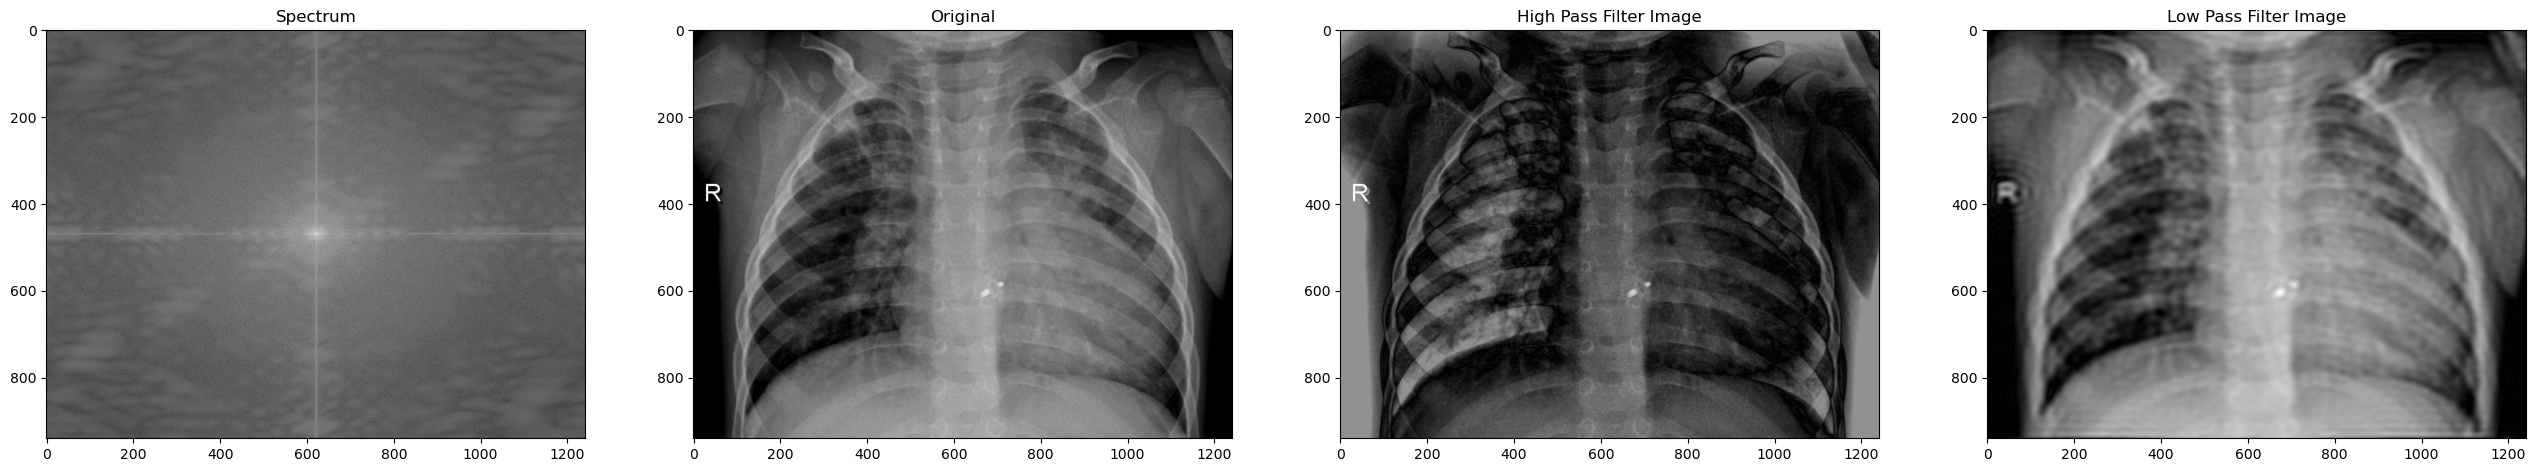

----------Normal----------


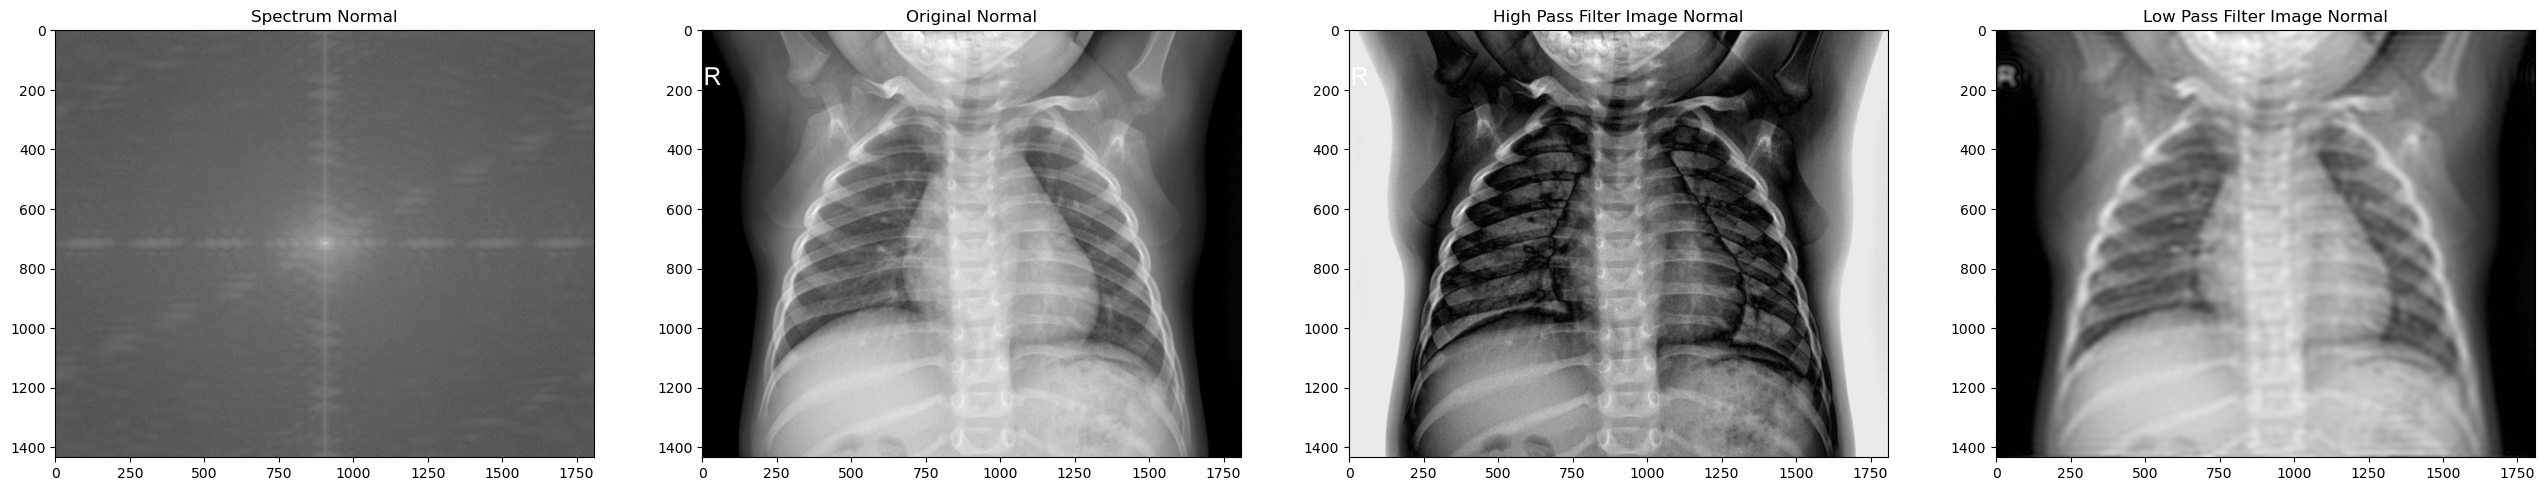

--------------------------------------------------------------------------------------------------- 



In [4]:
num = [2931 + i for i in range(3+1)]
num2 = 1000
num3 = 115 

input_Diameter_highpass = 1
input_Diameter_lowpass = 50

for n in num:
    
    bact_img = f"/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person{num2:04}_bacteria_{n:04}.jpeg"
    normal_img = f"/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-{num3:04}-0001.jpeg"
    
    if bact_img == '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1009_bacteria_2940.jpeg':
        num2 += 1
        continue
    elif bact_img == '/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1013_bacteria_2944.jpeg':
        num2 += 1
        continue
    elif bact_img =='/kaggle/input/chest-xray-pneumonia/chest_xray/train/PNEUMONIA/person1015_bacteria_2946.jpeg':
        num2 += 1
        continue
    
    if normal_img == '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0120-0001.jpeg':
        num3 -= 1
        num3 += 3
        continue
    elif normal_img == '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0121-0001.jpeg':
        num3 += 1
        continue
    elif normal_img == '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0124-0001.jpeg':
        num3 -= 1
        continue
    elif normal_img == '/kaggle/input/chest-xray-pneumonia/chest_xray/train/NORMAL/IM-0124-0001.jpeg':
        num3 -= 1
        continue
    
    # -------------------------------------------------------------

    # Proses FFT Peumonia
    img = cv2.imread(bact_img, 0)
    original = np.fft.fft2(img)
    center = np.fft.fftshift(original)
    
    # Proses FFT Normal
    img_normal = cv2.imread(normal_img, 0)
    original_normal = np.fft.fft2(img_normal)
    center_normal = np.fft.fftshift(original_normal)
    
    # -------------------------------------------------------------
    
    # Filtering Pneumonia
    HighPass = idealFilterHP(input_Diameter_highpass,img.shape) # High Pass Filter
    LowPass = idealFilterLP(input_Diameter_lowpass,img.shape) # Low Pass Filter
    
    HighPassCenter = center * HighPass # High Pass Center
    LowPassCenter = center * LowPass # Low Pass Center
    
    HighPass = np.fft.ifftshift(HighPassCenter) # High Pass 
    LowPass = np.fft.ifftshift(LowPassCenter) # Low Pass 
    
    # Filtering Normal
    HighPass_normal = idealFilterHP(input_Diameter_highpass,img_normal.shape) # High Pass Filter
    LowPass_normal = idealFilterLP(input_Diameter_lowpass,img_normal.shape) # Low Pass Filter
    
    HighPassCenter_normal = center_normal * HighPass_normal # High Pass Center
    LowPassCenter_normal = center_normal * LowPass_normal # Low Pass Center
    
    HighPass_normal = np.fft.ifftshift(HighPassCenter_normal) # High Pass 
    LowPass_normal = np.fft.ifftshift(LowPassCenter_normal) # Low Pass 
    
    # -------------------------------------------------------------
    print(10*'-'+'Pneumonia'+10*'-')
    
    # Inverting Pneumonia
    inverse_HighPass = np.fft.ifft2(HighPass) # High Pass Inverse
    inverse_LowPass = np.fft.ifft2(LowPass) # High Pass Inverse
    
    Processed_HighPass = np.abs(inverse_HighPass) # High Pass Processes
    Processed_LowPass = np.abs(inverse_LowPass) # High Pass Processes
    
    plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False)
    plt.subplot(141), plt.imshow(np.log(1+np.abs(center)), "gray"), plt.title("Spectrum")
    plt.subplot(142), plt.imshow(img, "gray"), plt.title("Original")
    
    plt.subplot(143), plt.imshow(Processed_HighPass, "gray"), plt.title("High Pass Filter Image") # High Pass Image
    plt.subplot(144), plt.imshow(Processed_LowPass, "gray"), plt.title("Low Pass Filter Image") # Low Pass Image
    
    plt.show()
    
    print(10*'-'+'Normal'+10*'-')
    
    # Inverting Normal
    inverse_HighPass_normal = np.fft.ifft2(HighPass_normal) # High Pass Inverse
    inverse_LowPass_normal = np.fft.ifft2(LowPass_normal) # High Pass Inverse
    
    Processed_HighPass_normal = np.abs(inverse_HighPass_normal) # High Pass Processes
    Processed_LowPass_normal = np.abs(inverse_LowPass_normal) # High Pass Processes
    
    plt.figure(figsize=(6.4*5, 4.8*5), constrained_layout=False) #
    plt.subplot(141), plt.imshow(np.log(1+np.abs(center_normal)), "gray"), plt.title("Spectrum Normal")
    plt.subplot(142), plt.imshow(img_normal, "gray"), plt.title("Original Normal")
    
    plt.subplot(143), plt.imshow(Processed_HighPass_normal, "gray"), plt.title("High Pass Filter Image Normal") # High Pass Image
    plt.subplot(144), plt.imshow(Processed_LowPass_normal, "gray"), plt.title("Low Pass Filter Image Normal") # Low Pass Image
    
    plt.show()
    
    # -------------------------------------------------------------

    # Saving image Penumonia
    HighPass_location = f"/kaggle/working/person{num2:04}_bacteria_{n:04}_HighPass.jpeg"
    LowPass_location = f"/kaggle/working/person{num2:04}_bacteria_{n:04}_LowPass.jpeg"
    
    # Saving image Normal
    HighPass_location_normal = f"/kaggle/working/IM-{num3:04}-0001_HighPass.jpeg"
    LowPass_location_normal = f"/kaggle/working/IM-{num3:04}-0001_LowPass.jpeg"
    
    plt.imsave(HighPass_location, Processed_HighPass, cmap='gray', format='PNG')
    plt.imsave(LowPass_location, Processed_LowPass, cmap='gray', format='PNG')
    
    plt.imsave(HighPass_location_normal, Processed_HighPass_normal, cmap='gray', format='PNG')
    plt.imsave(LowPass_location_normal, Processed_LowPass_normal, cmap='gray', format='PNG')
    
    # -------------------------------------------------------------

    print(99*"-","\n")

    num2 += 1
    num3 += 2